# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [99]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv', sep = ',')
df['plans_university'] = df['plans_universitypast_failures']
df.loc[df['plans_university'] < 0, 'plans_university'] = -1
df.loc[df['plans_university'] >= 0, 'plans_university'] = 1
df['past_failures'] = abs(df['plans_universitypast_failures']) % 10
del df['plans_universitypast_failures']
df

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
0,16,4,4,1,2,5,4,4.0,1.0,2.0,5,1,1,0,1,1,1,0
1,17,4,4,1,1,5,3,4.0,1.0,2.0,5,0,1,0,1,1,1,0
2,16,1,1,2,1,4,5,5.0,2.0,4.0,5,1,0,1,1,1,1,0
3,18,1,2,2,1,3,4,4.0,2.0,4.0,4,1,1,0,1,0,-1,0
4,17,2,1,2,2,4,2,5.0,1.0,2.0,5,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,18,2,2,4,2,4,2,5.0,1.0,1.0,2,0,1,0,1,1,1,0
645,15,4,4,2,2,4,3,1.0,1.0,1.0,5,1,1,0,1,1,1,0
646,21,1,1,2,2,5,3,3.0,5.0,2.0,4,1,0,1,1,1,-1,2
647,16,2,2,1,1,4,3,4.0,1.0,2.0,1,0,1,1,0,1,-1,0


### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

__(+1 балл)__

Дополнительно сравните качество замены на среднее по столбцу и на медиану по столбцу


*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [231]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv', sep = ',')
df['plans_university'] = df['plans_universitypast_failures']
df.loc[df['plans_university'] < 0, 'plans_university'] = -1
df.loc[df['plans_university'] >= 0, 'plans_university'] = 1
df['past_failures'] = abs(df['plans_universitypast_failures']) % 10
del df['plans_universitypast_failures']
df.loc[df['age'] >= 23, 'age'] = 2006 - df.loc[df['age'] >= 23, 'age']
df.loc[df['traveltime'] > 60, 'traveltime'] = 4
df.loc[df['traveltime'] > 30, 'traveltime'] = 3
df.loc[df['traveltime'] >= 15, 'traveltime'] = 2
df.loc[df['traveltime'] >= 5, 'traveltime'] = 1

df1 = df.copy()
df1_bad = df.copy()
df2 = df.copy()
for i in df1:
    df1.loc[df1[i].isnull(), i] = int(df1[i].mean())
# Нужны целые, тк у нас все значения в таблицы должны быть целые
for i in df1_bad:
    df1_bad.loc[df1_bad[i].isnull(), i] = df1_bad[i].mean()
for i in df2:
    df2.loc[df2[i].isnull(), i] = df2[i].median()
print("Разница среднего между способом медианы и среднего(с округлением):\n", df2.mean() - df1.mean())
print("Разница среднего между способом медианы и среднего(без округлением):\n", df2.mean() - df1_bad.mean())
for i in df:
    if df1.loc[df[i].isnull(), i].empty:
        continue
#     print(df.loc[df[i].isnull(), i])
    print(df1.loc[df[i].isnull(), i])
    print(df2.loc[df[i].isnull(), i])
print("Можно заметить, что они вывели одинаковые замены")

Разница среднего между способом медианы и среднего(с округлением):
 age                 0.0
Medu                0.0
Fedu                0.0
traveltime          0.0
studytime           0.0
famrel              0.0
freetime            0.0
goout               0.0
Dalc                0.0
Walc                0.0
health              0.0
sex_M               0.0
address_U           0.0
famsize_LE3         0.0
Pstatus_T           0.0
nursery             0.0
plans_university    0.0
past_failures       0.0
dtype: float64
Разница среднего между способом медианы и среднего(без округлением):
 age                 0.000000
Medu                0.000000
Fedu                0.000000
traveltime          0.000000
studytime           0.000000
famrel              0.000000
freetime            0.000000
goout              -0.000288
Dalc               -0.007668
Walc               -0.002646
health              0.000000
sex_M               0.000000
address_U           0.000000
famsize_LE3         0.000000
Pstatus_T

### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [232]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv', sep = ',')
df['plans_university'] = df['plans_universitypast_failures']
df.loc[df['plans_university'] < 0, 'plans_university'] = -1
df.loc[df['plans_university'] >= 0, 'plans_university'] = 1
df['past_failures'] = abs(df['plans_universitypast_failures']) % 10
del df['plans_universitypast_failures']
df.loc[df['age'] >= 23, 'age'] = 2006 - df.loc[df['age'] >= 23, 'age']
df.loc[df['traveltime'] > 60, 'traveltime'] = 4
df.loc[df['traveltime'] > 30, 'traveltime'] = 3
df.loc[df['traveltime'] >= 15, 'traveltime'] = 2
df.loc[df['traveltime'] >= 5, 'traveltime'] = 1
for i in df:
    df.loc[df[i].isnull(), i] = int(df[i].median())
df = (df - df.mean()) / df.std()
df

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
0,-0.610951,1.309206,1.539528,-0.759446,0.083588,1.118885,0.779877,0.692470,-0.532729,-0.221479,1.012122,1.199013,0.659674,-0.647676,0.374674,0.495281,0.344648,-0.374017
1,0.209975,1.309206,1.539528,-0.759446,-1.121943,1.118885,-0.171514,0.692470,-0.532729,-0.221479,1.012122,-0.832735,0.659674,-0.647676,0.374674,0.495281,0.344648,-0.374017
2,-0.610951,-1.335010,-1.187916,0.576274,-1.121943,0.072550,1.731268,1.543631,0.554507,1.340910,1.012122,1.199013,-1.513566,1.541603,0.374674,0.495281,0.344648,-0.374017
3,1.030900,-1.335010,-0.278768,0.576274,-1.121943,-0.973785,0.779877,0.692470,0.554507,1.340910,0.320683,1.199013,0.659674,-0.647676,0.374674,-2.015947,-2.897041,-0.374017
4,0.209975,-0.453605,-1.187916,0.576274,0.083588,0.072550,-1.122905,1.543631,-0.532729,-0.221479,1.012122,-0.832735,-1.513566,-0.647676,0.374674,0.495281,0.344648,-0.374017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1.030900,-0.453605,-0.278768,3.247713,0.083588,0.072550,-1.122905,1.543631,-0.532729,-1.002674,-1.062195,-0.832735,0.659674,-0.647676,0.374674,0.495281,0.344648,-0.374017
645,-1.431876,1.309206,1.539528,0.576274,0.083588,0.072550,-0.171514,-1.861013,-0.532729,-1.002674,1.012122,1.199013,0.659674,-0.647676,0.374674,0.495281,0.344648,-0.374017
646,3.493676,-1.335010,-1.187916,0.576274,0.083588,1.118885,-0.171514,-0.158691,3.816216,-0.221479,0.320683,1.199013,-1.513566,1.541603,0.374674,0.495281,-2.897041,2.997328
647,-0.610951,-0.453605,-0.278768,-0.759446,-1.121943,0.072550,-0.171514,0.692470,-0.532729,-0.221479,-1.753634,-0.832735,0.659674,1.541603,-2.664872,0.495281,-2.897041,-0.374017


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [371]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def normal(df): 
    return (df - df.mean()) / df.std()

df = pd.read_csv('data.csv', sep = ',')

scores = np.array([])
with open("scores.csv", "r") as f:
    for x in f:
        scores = np.append(scores, float(x))

df['plans_university'] = df['plans_universitypast_failures']
df.loc[df['plans_university'] < 0, 'plans_university'] = -1
df.loc[df['plans_university'] >= 0, 'plans_university'] = 1

df['past_failures'] = abs(df['plans_universitypast_failures']) % 10
del df['plans_universitypast_failures']

df.loc[df['age'] >= 23, 'age'] = 2006 - df.loc[df['age'] >= 23, 'age']

df.loc[df['traveltime'] > 60, 'traveltime'] = 4
df.loc[df['traveltime'] > 30, 'traveltime'] = 3
df.loc[df['traveltime'] >= 15, 'traveltime'] = 2
df.loc[df['traveltime'] >= 5, 'traveltime'] = 1

model = LinearRegression()
df1_bad = df.copy()
df2 = df.copy()
# Возьмём тот, что без округления
for i in df1_bad:
    df1_bad.loc[df1_bad[i].isnull(), i] = df1_bad[i].mean()
print(cross_val_score(model, normal(df1_bad), scores).mean())
for i in df2:
    df2.loc[df2[i].isnull(), i] = int(df2[i].median())
print(cross_val_score(model, normal(df2), scores).mean())

0.20489712298208423
0.20542750992317585


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Попробуйте несколько способов добавления полных данных

In [257]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def normal(df): 
    return (df - df.mean()) / df.std()

df = pd.read_csv('data.csv', sep = ',')
scores = np.array([])
with open("scores.csv", "r") as f:
    for x in f:
        scores = np.append(scores, float(x))
df['plans_university'] = df['plans_universitypast_failures']
df.loc[df['plans_university'] < 0, 'plans_university'] = -1
df.loc[df['plans_university'] >= 0, 'plans_university'] = 1

df['past_failures'] = abs(df['plans_universitypast_failures']) % 10
del df['plans_universitypast_failures']

df.loc[df['age'] >= 23, 'age'] = 2006 - df.loc[df['age'] >= 23, 'age']

df.loc[df['traveltime'] > 60, 'traveltime'] = 4
df.loc[df['traveltime'] > 30, 'traveltime'] = 3
df.loc[df['traveltime'] >= 15, 'traveltime'] = 2
df.loc[df['traveltime'] >= 5, 'traveltime'] = 1

at = pd.read_csv('attendance.csv', sep = ';')
at = at.fillna(0)
at = at.replace('+', 1)
data['attendance'] = at.sum(axis = 1)

sc = []

with open('school_support.txt', 'r') as f:
    for x in f:
        sc.append(int(x) - 1)
        
df['school_support'] = [0] * len(df)
df.loc[sc,'school_support'] = 1
for i in df:
    df.loc[df[i].isnull(), i] = int(df[i].median())
df

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,school_support
0,16,4,4,1,2,5,4,4.0,1.0,2.0,5,1,1,0,1,1,1,0,0
1,17,4,4,1,1,5,3,4.0,1.0,2.0,5,0,1,0,1,1,1,0,0
2,16,1,1,2,1,4,5,5.0,2.0,4.0,5,1,0,1,1,1,1,0,0
3,18,1,2,2,1,3,4,4.0,2.0,4.0,4,1,1,0,1,0,-1,0,0
4,17,2,1,2,2,4,2,5.0,1.0,2.0,5,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,18,2,2,4,2,4,2,5.0,1.0,1.0,2,0,1,0,1,1,1,0,0
645,15,4,4,2,2,4,3,1.0,1.0,1.0,5,1,1,0,1,1,1,0,0
646,21,1,1,2,2,5,3,3.0,5.0,2.0,4,1,0,1,1,1,-1,2,0
647,16,2,2,1,1,4,3,4.0,1.0,2.0,1,0,1,1,0,1,-1,0,0


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

array([[<Axes: title={'center': 'traveltime'}>]], dtype=object)

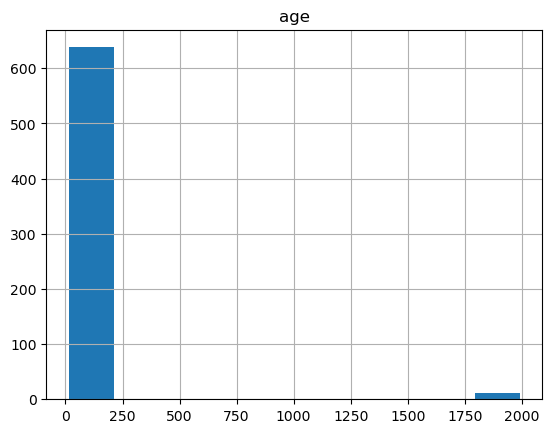

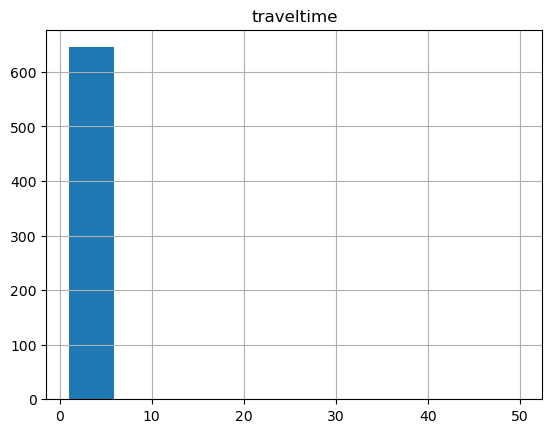

In [367]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def normal(df): 
    return (df - df.mean()) / df.std()

df = pd.read_csv('data.csv', sep = ',')
scores = np.array([])
with open("scores.csv", "r") as f:
    for x in f:
        scores = np.append(scores, float(x))
df['plans_university'] = df['plans_universitypast_failures']
df.loc[df['plans_university'] < 0, 'plans_university'] = -1
df.loc[df['plans_university'] >= 0, 'plans_university'] = 1

df['past_failures'] = abs(df['plans_universitypast_failures']) % 10
del df['plans_universitypast_failures']

# df.loc[df['age'] >= 23, 'age'] = 2006 - df.loc[df['age'] >= 23, 'age']

# df.loc[df['traveltime'] > 60, 'traveltime'] = 4
# df.loc[df['traveltime'] > 30, 'traveltime'] = 3
# df.loc[df['traveltime'] >= 15, 'traveltime'] = 2
# df.loc[df['traveltime'] >= 5, 'traveltime'] = 1

at = pd.read_csv('attendance.csv', sep = ';')
at = at.fillna(0)
at = at.replace('+', 1)
data['attendance'] = at.sum(axis = 1)

sc = []

with open('school_support.txt', 'r') as f:
    for x in f:
        sc.append(int(x) - 1)
        
df['school_support'] = [0] * len(df)
df.loc[sc,'school_support'] = 1
for i in df:
    df.loc[df[i].isnull(), i] = int(df[i].median())

df.hist('age')
df.hist('traveltime')
#Так как traveltime, чисел которые больше 5 крайне мало, на гистограмме их не видно, 
#Ещё помжно вот так(в одной картинке)
# for i in df:
#     df[i].hist(legend = True)
#Но тк age у нас имеет крайне большой разброс между минимальным и максимальным значеним, будет отображаться только age, тк
#другие "тонкие"
#Либо можно вывести каждую гистаграмму отдельно
# for i in df:
#     df.hist(i)

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказаниепосчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

In [404]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model

def normal(df): 
    return (df - df.mean()) / df.std()

df = pd.read_csv('data.csv', sep = ',')
scores = np.array([])
with open("scores.csv", "r") as f:
    for x in f:
        scores = np.append(scores, float(x))
# scores = normal(scores)
df['plans_university'] = df['plans_universitypast_failures']
df.loc[df['plans_university'] < 0, 'plans_university'] = -1
df.loc[df['plans_university'] >= 0, 'plans_university'] = 1

df['past_failures'] = abs(df['plans_universitypast_failures']) % 10
del df['plans_universitypast_failures']

df.loc[df['age'] >= 23, 'age'] = 2006 - df.loc[df['age'] >= 23, 'age']

df.loc[df['traveltime'] > 60, 'traveltime'] = 4
df.loc[df['traveltime'] > 30, 'traveltime'] = 3
df.loc[df['traveltime'] >= 15, 'traveltime'] = 2
df.loc[df['traveltime'] >= 5, 'traveltime'] = 1

at = pd.read_csv('attendance.csv', sep = ';')
at = at.fillna(0)
at = at.replace('+', 1)
data['attendance'] = at.sum(axis = 1)

sc = []

with open('school_support.txt', 'r') as f:
    for x in f:
        sc.append(int(x) - 1)
df['school_support'] = [0] * len(df)
df.loc[sc,'school_support'] = 1

for i in df:
    df.loc[df[i].isnull(), i] = int(df[i].median())
df1 = normal(df)
regression = linear_model.LinearRegression().fit(df1, scores) #create model and train it
prediction = regression.predict(df1)
error = (prediction - scores)**2 #simple error - square error
e = []
for i in range(len(error)):
    e.append([error[i], i])
e.sort()
for i in e:
    print(scores[i[1]], *i, '\n')
#можно увидеть, что при scores[i[1]] < 1, *i достаточно большие
print(error.mean())

60.0 0.0003447349861724986 171 

30.0 0.0003503050472979158 275 

65.0 0.0028114739628662816 103 

60.0 0.003578115287226975 559 

55.0 0.00965791520145024 89 

50.0 0.011560366129194819 642 

65.0 0.015007337023561591 49 

65.0 0.02206289970668215 469 

50.0 0.022835561860971142 58 

65.0 0.031237387618522156 531 

60.0 0.04091177184354127 598 

70.0 0.04154952370562666 382 

70.0 0.04920751762171559 111 

65.0 0.11243326533253338 625 

65.0 0.12671964380214992 337 

70.0 0.15054288868897617 356 

50.0 0.17104097332658194 447 

55.0 0.17365599947402535 643 

65.0 0.1935364752708542 517 

65.0 0.20672116452713005 362 

65.0 0.21545486149408707 207 

55.0 0.28544107451465334 291 

55.0 0.28578648188113764 167 

50.0 0.29039453822858274 289 

35.0 0.2965174988911777 521 

60.0 0.3475416797232143 309 

50.0 0.4129158169166901 608 

65.0 0.4456431286086375 433 

50.0 0.5161287346942629 88 

55.0 0.5209082083952068 307 

65.0 0.5396624417614374 611 

65.0 0.5414108948996348 54 

60.0 0.5618

In [1]:
# Your code here
# ...

### Финальное предсказание и отчёт

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [433]:
import pandas as pd
import numpy as np

import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
def normal(df): 
    return (df - df.mean()) / df.std()

df = pd.read_csv('data.csv', sep = ',')
scores = np.array([])
with open("scores.csv", "r") as f:
    for x in f:
        scores = np.append(scores, float(x))
df['plans_university'] = df['plans_universitypast_failures']
df.loc[df['plans_university'] < 0, 'plans_university'] = -1
df.loc[df['plans_university'] >= 0, 'plans_university'] = 1

df['past_failures'] = abs(df['plans_universitypast_failures']) % 10
del df['plans_universitypast_failures']

df.loc[df['age'] >= 23, 'age'] = 2006 - df.loc[df['age'] >= 23, 'age']

df.loc[df['traveltime'] > 60, 'traveltime'] = 4
df.loc[df['traveltime'] > 30, 'traveltime'] = 3
df.loc[df['traveltime'] >= 15, 'traveltime'] = 2
df.loc[df['traveltime'] >= 5, 'traveltime'] = 1

at = pd.read_csv('attendance.csv', sep = ';')
at = at.fillna(0)
at = at.replace('+', 1)
data['attendance'] = at.sum(axis = 1)

sc = []

with open('school_support.txt', 'r') as f:
    for x in f:
        sc.append(int(x) - 1)
        
df['school_support'] = [0] * len(df)
df.loc[sc,'school_support'] = 1
df1 = df.copy()
df2 = df.copy()
for i in df:
    df1.loc[df[i].isnull(), i] = int(df1[i].median())
    df2.loc[df[i].isnull(), i] = df2[i].mean()
df1 = df1.loc[scores >= 1]
df2 = df2.loc[scores >= 1]
df1.loc[df1['age'] > 19, 'age'] = df1.loc[df1['age'] <= 19, 'age'].median()
df2.loc[df2['age'] > 19, 'age'] = df2.loc[df2['age'] <= 19, 'age'].mean()
scores = np.delete(scores, scores < 1)
df1 = normal(df1)
df2 = normal(df2)

x1_train, x1_test, y1_train, y1_test = train_test_split(df1.values, scores, test_size=0.4, random_state=0)
x2_train, x2_test, y2_train, y2_test = train_test_split(df2.values, scores, test_size=0.4, random_state=0)
regression1 = linear_model.LinearRegression().fit(x1_train, y1_train)
regression2 = linear_model.LinearRegression().fit(x2_train, y2_train)
prediction1 = regression.predict(x1_test)
prediction2 = regression.predict(x2_test)
error1 = (prediction1 - y1_test)**2 #simple error - square error
error2 = (prediction2 - y2_test)**2 #simple error - square error


print(error1.mean())
print(error2.mean())

130.52101480233503
130.75133579646516


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Было интересно исправлять ошибку смотря на гистаграмму, хотелось чтобы как нибудь явно показывались выбросы, но ничего не нашёл, тк по сути нам нужно просто изменить масштаб, но тогда график будет слишком большим. После удаление scores < 1, квадрат ошибки стал меньше. Пользовался помощью **Газизова Данияра**